In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [21]:
# NLTK Models

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Convert POS tag from NLTK to WordNet

In [37]:
def nltk_to_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [23]:
def preprocess_text(text):
    # Stop words specific for the task
    cstm_stop_words = [
      'ako', 'ikaw', 'siya', 'kami', 'kayo', 'sila','ang', 'ng', 'sa', 'ni', 'kay', 'kina','ito', 'iyan', 'iyon', 'ito', 'po', 'ho', 'eh', 'namin'
      'doon', 'dito', 'din', 'rin', 'ba', 'iyon', 'iyan', 'saan', 'kailan', 'paano', 'ano','mga', 'si', 'ni', 'kay', 'kina','ko', 'mo', 'niya', 'e'
      'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from', 'or', 'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the',
      'to', 'was', 'were', 'will', 'with','i', 'you', 'your', 'yours', 'me', 'my', 'we', 'they', 'them','this', 'these', 'those', 'there',
      'here', 'what', 'which', 'who','whom', 'why', 'how', 'if', 'na'
    ]

    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text.lower())
    pos_tags = nltk.pos_tag(words)

    cleaned_words = []
    for word, tag in pos_tags:
      if word in cstm_stop_words:
        continue
      if word in string.punctuation:
        continue
      if not word.isalpha():
        continue

      lemma = lemmatizer.lemmatize(word, nltk_to_wordnet_pos(tag))
      cleaned_words.append(lemma)

    return " ".join(cleaned_words)

In [24]:
df = pd.read_csv('Student_Sentiment_Taglish(English Filipino).csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SENTIMENT  3216 non-null   object
 1   POLARITY   3216 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.4+ KB


The dataset was cleaned before training. The 'POLARITY' labels are converted into numeric values: Positive = 2, Neutral = 1, and Negative = 0.

In [25]:
df.head(10)

,SENTIMENT,POLARITY
0,My overall learning experience at university h...,2
1,It was unpractical and I hate the experience. ...,0
2,"Overall, the university provide effective qual...",1
3,The state university as an educational instuti...,0
4,The overall learning experience provided by ou...,2
5,My overall experience is excellent. The best u...,2
6,Very student centered. I like it a lot. Very m...,1
7,It was full of knowledge and cherishable memor...,2
8,Overall experience ko is excellent.,2
9,My overall learning experience at the universi...,2


In [26]:
df["SENTIMENT"] = df["SENTIMENT"].apply(preprocess_text)
df.head(10)

,SENTIMENT,POLARITY
0,overall learning experience university be posi...,2
1,unpractical hate experience hope get good,0
2,overall university provide effective quality e...,1
3,state university educational instution disappo...,0
4,overall learning experience provide our state ...,2
5,overall experience excellent best university s...,2
6,very student center like a lot very much pleased,1
7,full knowledge cherishable memory together our...,2
8,overall experience excellent,2
9,overall learning experience university be enri...,2


In [27]:
df["POLARITY"].value_counts()

,count
POLARITY,
2,1517
0,966
1,733


Split the dataset into training and testing sets. 90/10, respectively.

In [28]:
SEED = 24

X = df['SENTIMENT']
y = df['POLARITY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=SEED)

In [29]:
vectorizer = CountVectorizer()
X_train_vector = vectorizer.fit_transform(X_train.values)
X_test_vector = vectorizer.transform(X_test.values)

In [30]:
model_vocab = vectorizer.vocabulary_
print(f'Vocab Size: {len(model_vocab)}')

Vocab Size: 2839


In [31]:
# Frequent Words
X = vectorizer.transform(df['SENTIMENT'])

word_counts = np.asarray(X.sum(axis=0)).flatten()

words = vectorizer.get_feature_names_out()
word_freq = list(zip(words, word_counts))

word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)

top_25 = word_freq_sorted[:10]

for word, count in top_25:
    print(f"{word}: {int(count)}")

student: 461
class: 453
schedule: 412
experience: 404
good: 395
very: 375
not: 339
professor: 330
feel: 324
learning: 320


In [32]:
class_weights = [0.4, 0.3, 1]

model = MultinomialNB(alpha=0.8, class_prior=class_weights)
model.fit(X_train_vector, y_train)
accuracy = model.score(X_test_vector, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.86%


In [33]:
# Model Eval

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test_vector)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred, average='weighted')  # or 'macro', 'micro'
print(f"Precision: {precision * 100:.2f}%")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall * 100:.2f}%")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

Accuracy: 92.86%
Precision: 93.06%
Recall: 92.86%
F1 Score: 92.85%


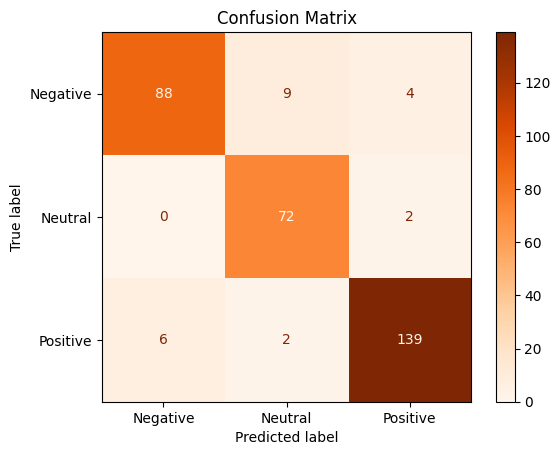

In [34]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Neutral', 'Positive']

cfm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cfm.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix")
plt.show()

In [35]:
def model_prediction(sentence):
  sentence_vector = vectorizer.transform([sentence])

  prediction = model.predict(sentence_vector)
  probabilities = model.predict_proba(sentence_vector)[0]
  confidence = max(probabilities)
  predicted_class = prediction[0]

  if predicted_class == 2:
      return (f"Positive ({confidence:.2f} confidence)")
  elif predicted_class == 1:
      return (f"Neutral ({confidence:.2f} confidence)")
  else:
      return (f"Negative ({confidence:.2f} confidence)")

**Test Results**

In [36]:
sample_sentences = [
    ("Positive", "The best university ever! I love studying here. The experience is amazing!"),
    ("Positive", "Okay yung discussion, na-explain nang maayos and may mga examples kaya mas madali ko siyang naintindihan. Salamat po!"),
    ("Neutral", "Okay lang po yung lesson, medyo na-gets ko naman pero may parts na pwede pa pong i-explain better"),
    ("Negative", "Medyo nahirapan ako intindihin 'yung lesson kasi ang bilis ng pacing tsaka parang sabay-sabay yung info. Sana next time may mas madaming examples or mas chill na explain."),
    ("Negative", "The facilities really need improvement. Some classrooms are too hot, and the equipment is either outdated or not working properly. It affects our focus during class."),
]

for label, sentence in sample_sentences:
  print(f'{sentence} \n\
        True Label: {label} | Prediction: {model_prediction(sentence)}\n')


The best university ever! I love studying here. The experience is amazing! 
        True Label: Positive | Prediction: Positive (1.00 confidence)

Okay yung discussion, na-explain nang maayos and may mga examples kaya mas madali ko siyang naintindihan. Salamat po! 
        True Label: Positive | Prediction: Positive (0.82 confidence)

Okay lang po yung lesson, medyo na-gets ko naman pero may parts na pwede pa pong i-explain better 
        True Label: Neutral | Prediction: Neutral (0.99 confidence)

Medyo nahirapan ako intindihin 'yung lesson kasi ang bilis ng pacing tsaka parang sabay-sabay yung info. Sana next time may mas madaming examples or mas chill na explain. 
        True Label: Negative | Prediction: Negative (1.00 confidence)

The facilities really need improvement. Some classrooms are too hot, and the equipment is either outdated or not working properly. It affects our focus during class. 
        True Label: Negative | Prediction: Negative (0.67 confidence)

